# Homework 4: Distributions from Distributions

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
## Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

- This time, we will directly pull samples from the population using rand(Normal(μ, σ), N=3).

   Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

In [1]:
using Random, Distributions
using Statistics

rand_collection(data, s) = rand(data, (1, s));

function t_value(collct, μ)
    n = length(collct)
    X = mean(collct)
    S = std(collct, corrected=true, mean=X)
    return sqrt(n)*(X - μ)/S
end

function t_distribution(data, s, L)
    μ = mean(data)
    dist = [t_value(rand_collection(data, s), μ) for j in range(1, L)]
    return dist
end;

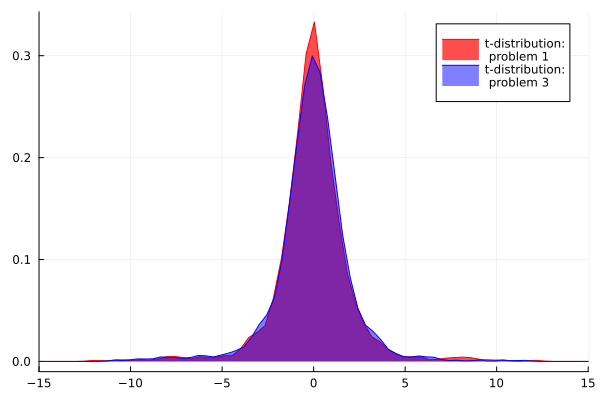

In [2]:
using StatsPlots

norm_data = rand(Normal(12, 2), 10000);
t_dist = t_distribution(norm_data, 3, 1000)

μ = 6; σ = 3
x_dist = [t_value(rand(Normal(μ, σ), 3), μ)  for j in range(1, 1000)]

denst = density(t_dist, color=:red, fill=(0, .7, :red), label="t-distribution:\n problem 1")
density!(denst, x_dist, color=:blue, fill=(0, .5, :blue), label="t-distribution:\n problem 3", xlim=(-15, 15))

Compare the t distribution to the t distribution estimated in Problem 1 and Comment.
<div class="alert alert-block alert-info">
<b>Comments: Apparently there is no substantial change despite the fact that the mean and standard deviation used to construct the normal distribution are different in both cases</b>.
</div>

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **YOU COMMENT HERE :-)**
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.